# COVID-19 correlation with Vaccination & Air Pollution in NewYork_7 Team
## 1. COVID-19 : 확진자와 사망자, 그리고 백신의 상관관계 분석
## 1.1 COVID-19 확진자 및 사망자 분석
### 1.1.1 필요 Library Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

### 1.1.2 COVID-19 확진자 Data 불러오기 (read_csv)
- Daily Trends

In [2]:
columns = ['State', 'Date', 'New Cases']
ny_cases = pd.read_csv('files/data_table_for_daily_case_trends__new_york_(excludes_nyc)_.csv', index_col=None, skiprows=[0,1], usecols=columns)
nyc_cases = pd.read_csv('files/data_table_for_daily_case_trends__new_york_city_.csv', index_col=None, skiprows=[0,1], usecols=columns)
nyc_cases = nyc_cases[nyc_cases['New Cases'] != 0]
ny_cases = ny_cases[ny_cases['New Cases'] != 0]

In [3]:
ny_total = pd.merge(ny_cases, nyc_cases, on='Date', how='inner')
ny_total['New Cases Sum'] = ny_total['New Cases_x'] + ny_total['New Cases_y']
ny_total.rename(columns = {'New Cases_x' : 'New York (Exclude NYC) New Cases', 'New Cases_y': 'New York City New Cases'}, inplace = True)

In [4]:
ny_total['Date'] = pd.to_datetime(ny_total['Date'])
ny_total = ny_total.sort_values(by="Date")
ny_total

,State_x,Date,New York (Exclude NYC) New Cases,State_y,New York City New Cases,New Cases Sum
548,New York,2020-03-05,11,New York City,1,12
547,New York,2020-03-06,9,New York City,5,14
546,New York,2020-03-07,7,New York City,3,10
545,New York,2020-03-09,97,New York City,7,104
544,New York,2020-03-10,12,New York City,21,33
...,...,...,...,...,...,...
4,New York,2021-09-01,2829,New York City,1785,4614
3,New York,2021-09-02,3256,New York City,2155,5411
2,New York,2021-09-03,3791,New York City,1499,5290
1,New York,2021-09-04,3374,New York City,1499,4873


### 1.1.3 COVID-19 확진자 시각화 (Plot)

<AxesSubplot:title={'center':'NY Daily Confirmed Cases'}, xlabel='Date', ylabel='Number of Cases'>

<Figure size 432x288 with 0 Axes>

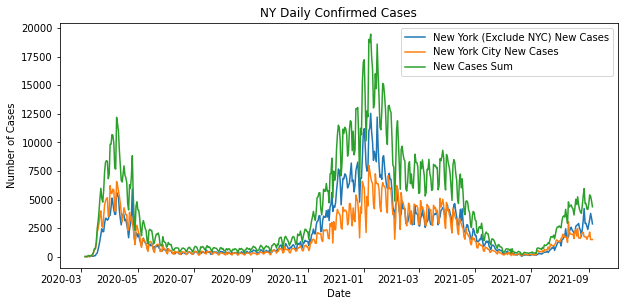

In [5]:
plt.figure()
ny_total.plot(x='Date', figsize=(10,5), ylabel='Number of Cases', rot=0, title='NY Daily Confirmed Cases')

### 1.1.4 COVID-19 확진자 Data 불러오기 (read_csv)
- 연령 및 성별 Data
- Daily trends

In [6]:
us_deaths_sex_age = pd.read_csv('files/Provisional_COVID-19_Deaths_by_Sex_and_Age.csv',usecols=['Year','State','Month','Sex','Age Group','COVID-19 Deaths','Group'],index_col=None)
ny_deaths = pd.read_csv('files/data_table_for_daily_death_trends__new_york_(excludes_nyc)_.csv', index_col=None, skiprows=[0,1], usecols=['State','Date','New Deaths'])
nyc_deaths = pd.read_csv('files/data_table_for_daily_death_trends__new_york_city_.csv', index_col=None, skiprows=[0,1], usecols=['State','Date','New Deaths'])

In [7]:
nyc_deaths

,State,Date,New Deaths
0,New York City,Sep 6 2021,0
1,New York City,Sep 5 2021,12
2,New York City,Sep 4 2021,11
3,New York City,Sep 3 2021,11
4,New York City,Sep 2 2021,13
...,...,...,...
588,New York City,Jan 27 2020,0
589,New York City,Jan 26 2020,0
590,New York City,Jan 25 2020,0
591,New York City,Jan 24 2020,0


In [8]:
nyc_deaths = nyc_deaths[nyc_deaths['New Deaths'] != 0]
ny_deaths = ny_deaths[ny_deaths['New Deaths'] != 0]
ny_total_deaths = pd.merge(ny_deaths, nyc_deaths, on='Date', how='inner')

ny_total_deaths['New Deaths Sum'] = ny_total_deaths['New Deaths_x'] + ny_total_deaths['New Deaths_y']
ny_total_deaths.rename(columns = {'New Deaths_x' : 'New York (Exclude NYC) New Deaths', 'New Deaths_y': 'New York City New Deaths'}, inplace = True)

ny_total_deaths['Date'] = pd.to_datetime(ny_total_deaths['Date'])
ny_total_deaths = ny_total_deaths.sort_values(by="Date")
ny_total_deaths

,State_x,Date,New York (Exclude NYC) New Deaths,State_y,New York City New Deaths,New Deaths Sum
514,New York,2020-03-19,4,New York City,11,15
513,New York,2020-03-20,10,New York City,24,34
512,New York,2020-03-21,6,New York City,27,33
511,New York,2020-03-22,3,New York City,50,53
510,New York,2020-03-23,7,New York City,50,57
...,...,...,...,...,...,...
4,New York,2021-09-01,18,New York City,10,28
3,New York,2021-09-02,24,New York City,13,37
2,New York,2021-09-03,20,New York City,11,31
1,New York,2021-09-04,18,New York City,11,29


### 1.1.5 COVID-19 확진자 시각화 (Plot)

<AxesSubplot:title={'center':'NY Daily Confirmed Cases'}, xlabel='Date', ylabel='Number of Deaths'>

<Figure size 432x288 with 0 Axes>

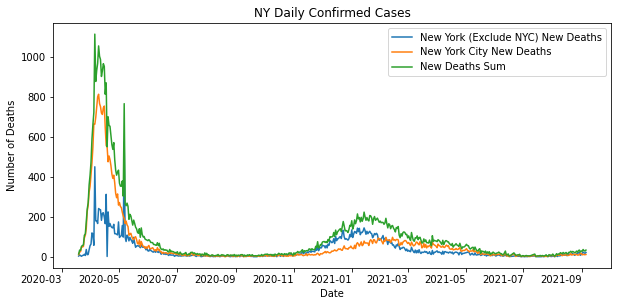

In [9]:
ny_total_deaths
plt.figure()
ny_total_deaths.plot(x='Date', figsize=(10,5), ylabel='Number of Deaths', rot=0, title='NY Daily Confirmed Cases')

### 1.1.6 연령 및 성별에 따른 분류

In [10]:
us_deaths_sex_age

,Group,Year,Month,State,Sex,Age Group,COVID-19 Deaths
0,By Total,NaN,NaN,United States,All Sexes,All Ages,633786.0
1,By Total,NaN,NaN,United States,All Sexes,Under 1 year,94.0
2,By Total,NaN,NaN,United States,All Sexes,0-17 years,400.0
3,By Total,NaN,NaN,United States,All Sexes,1-4 years,50.0
4,By Total,NaN,NaN,United States,All Sexes,5-14 years,133.0
...,...,...,...,...,...,...,...
63337,By Month,2021.0,8.0,Puerto Rico,Female,50-64 years,25.0
63338,By Month,2021.0,8.0,Puerto Rico,Female,55-64 years,16.0
63339,By Month,2021.0,8.0,Puerto Rico,Female,65-74 years,21.0
63340,By Month,2021.0,8.0,Puerto Rico,Female,75-84 years,12.0


In [11]:
ny_deaths_sex_age = us_deaths_sex_age[us_deaths_sex_age['State']=='New York']

In [12]:
ny_deaths_sex_age_monthly = ny_deaths_sex_age[ny_deaths_sex_age['Group']=='By Month']
ny_deaths_date_series = ny_deaths_sex_age_monthly['Year'].astype('int').astype('str') + "/" + ny_deaths_sex_age_monthly['Month'].astype('int').astype('str')
ny_deaths_sex_age_monthly['Date'] = pd.to_datetime(ny_deaths_date_series)

C:\Users\CHANGH~1\AppData\Local\Temp/ipykernel_16608/4075795640.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ny_deaths_sex_age_monthly['Date'] = pd.to_datetime(ny_deaths_date_series)


In [13]:
ny_deaths_sex_age_monthly = ny_deaths_sex_age_monthly.drop(['Group','Year','Month','State'], axis=1)

In [14]:
ny_deaths_sex_age_monthly.head(20)

,Sex,Age Group,COVID-19 Deaths,Date
41922,All Sexes,All Ages,0.0,2020-01-01
41923,All Sexes,Under 1 year,0.0,2020-01-01
41924,All Sexes,0-17 years,0.0,2020-01-01
41925,All Sexes,1-4 years,0.0,2020-01-01
41926,All Sexes,5-14 years,0.0,2020-01-01
41927,All Sexes,15-24 years,0.0,2020-01-01
41928,All Sexes,18-29 years,0.0,2020-01-01
41929,All Sexes,25-34 years,0.0,2020-01-01
41930,All Sexes,30-39 years,0.0,2020-01-01
41931,All Sexes,35-44 years,0.0,2020-01-01


### 1.1.7 연령별로 그룹화 하기 (groupby)

In [15]:
df_dic = {}
age_groups = ['0-17 years', '18-29 years', '30-39 years','40-49 years', '50-64 years','65-74 years','75-84 years']
sex_groups = ['Male', 'Female']
index = [ date[:7] for date in list(np.array(ny_deaths_sex_age_monthly['Date'].drop_duplicates().astype(str)))]
index = [val+" "+sex for val in index for sex in sex_groups]

for age_group in age_groups:
    l = []
    for sex in sex_groups:
        df =  ny_deaths_sex_age_monthly[(ny_deaths_sex_age_monthly['Age Group']==age_group) &\
                (ny_deaths_sex_age_monthly['Sex']==sex)]
        series = df['COVID-19 Deaths'].fillna(0)
        l_part = list(np.array(series))
        for i in range(20-len(l_part)):
            l_part.append(0)
        l.extend(l_part)
    df_dic[age_group] = l
        
deaths_plotdata = pd.DataFrame(df_dic, index=index)
deaths_plotdata.head()

,0-17 years,18-29 years,30-39 years,40-49 years,50-64 years,65-74 years,75-84 years
2020-01 Male,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01 Female,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02 Male,0.0,0.0,15.0,16.0,84.0,84.0,109.0
2020-02 Female,0.0,15.0,47.0,163.0,756.0,964.0,1053.0
2020-03 Male,0.0,0.0,0.0,44.0,247.0,316.0,338.0


### 1.1.8 연령 및 성별에 따른 시각화 (Matplotlib)

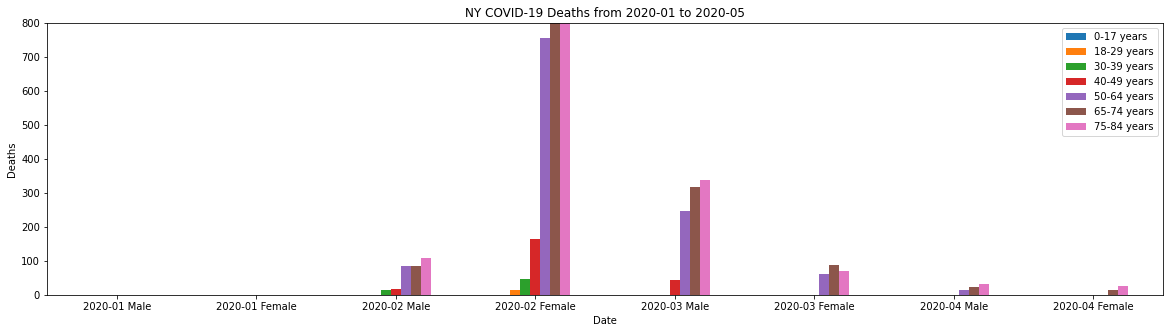

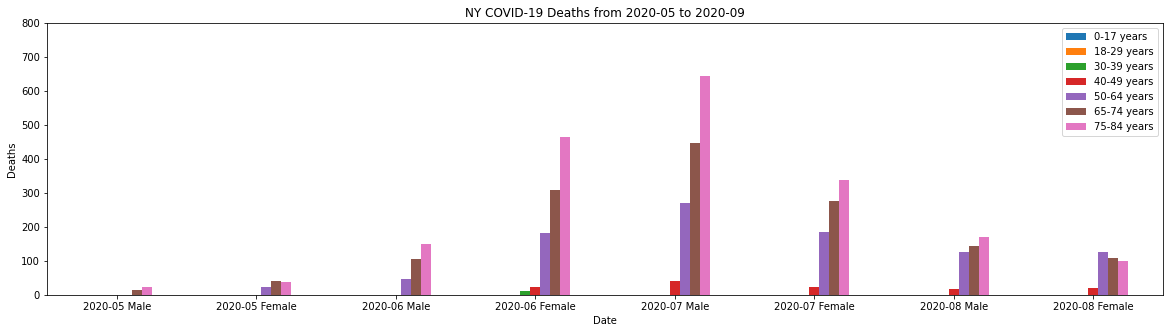

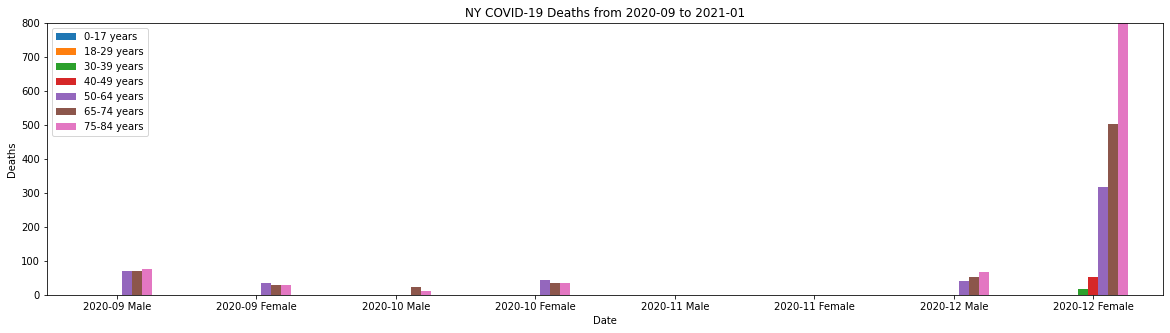

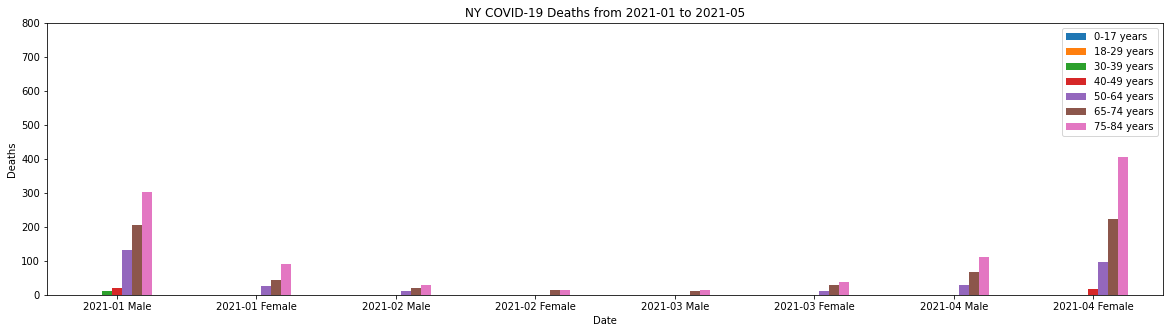

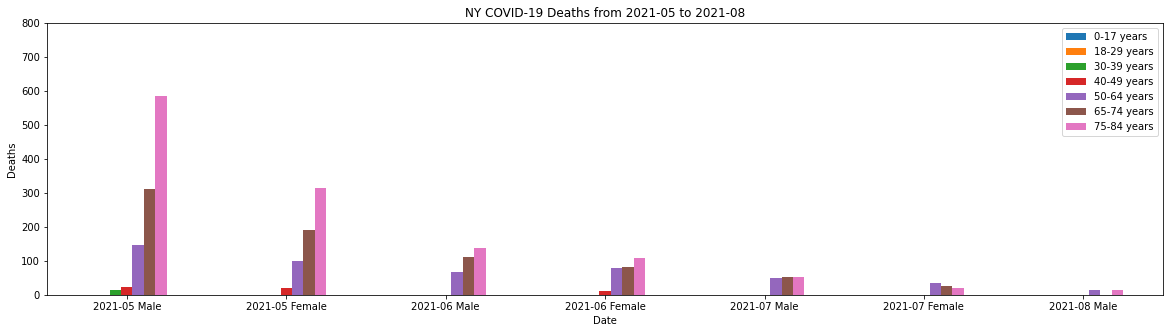

In [16]:
increment = 8
for i in range(0, len(index), increment):
    end = i+increment
    if end >= len(index):
        end = len(index)-1
    deaths_plotdata2 = deaths_plotdata.iloc[i:end]
    d = pd.DataFrame(deaths_plotdata2)
    d.plot(kind='bar', figsize=(20,5), rot=0)
    plt.title('NY COVID-19 Deaths from {} to {}'.format(index[i][:7], index[end][:7]))
    plt.xlabel('Date')
    plt.ylabel('Deaths')
    plt.ylim(0, 800)
    ax = plt.gca()
    plt.show()

### 1.1.9 성별에 따른 사망자 분포 (Pivot_table)

In [17]:
d = deaths_plotdata

d['Sum'] = d['0-17 years'] + d['18-29 years'] + d['30-39 years']+ d['40-49 years'] +d['50-64 years'] +\
            d['65-74 years'] + d['75-84 years']
n = len(d)
d['Sex'] = ['Male', 'Female']*int(n/2)
d1 = d.iloc[:, 7:9]
d1.head()

,Sum,Sex
2020-01 Male,0.0,Male
2020-01 Female,0.0,Female
2020-02 Male,308.0,Male
2020-02 Female,2998.0,Female
2020-03 Male,945.0,Male


In [18]:
table = pd.pivot_table(d1, columns=['Sex'], index=['Sex'], aggfunc=np.sum, values=['Sum'], fill_value=0)
table

Sum      
Sex    Female  Male
Sex                
Female   9547     0
Male        0  6461

In [19]:
d2 = deaths_plotdata
n = len(d2)
d2['Sex'] = ['Male', 'Female']*int(n/2)
d2 = d2.groupby(d2['Sex']).sum()

d2 = d2.reset_index()
del d2['Sex']
del d2['Sum']
sum = [d2['0-17 years'].sum()
	, d2['18-29 years'].sum()
    , d2['30-39 years'].sum()	
    , d2['40-49 years'].sum()	
    , d2['50-64 years'].sum()	
    , d2['65-74 years'].sum()	
    , d2['75-84 years'].sum()]

d2.loc[2] = sum
d2

,0-17 years,18-29 years,30-39 years,40-49 years,50-64 years,65-74 years,75-84 years
0,0.0,15.0,73.0,330.0,2106.0,2992.0,4031.0
1,0.0,0.0,38.0,162.0,1346.0,2053.0,2862.0
2,0.0,15.0,111.0,492.0,3452.0,5045.0,6893.0


### 1.1.10 Pie Chart를 이용한 성별 및 연령별 시각화

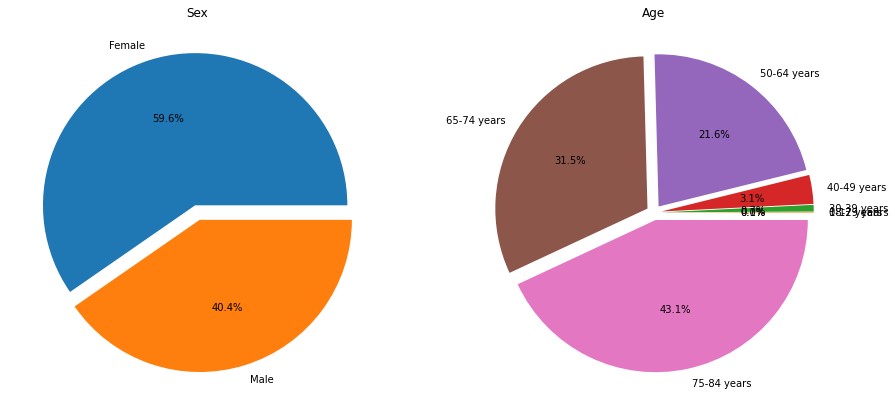

In [20]:
f, ax = plt.subplots(1, 2, figsize = (15, 7))

values1 = [table.iloc[0, 0], table.iloc[1, 1]]
labels1 = ['Female', 'Male']
explode1 = [0.05, 0.05]

values2 = sum
labels2 = ['0-17 years', '18-29 years', '30-39 years', '40-49 years', '50-64 years', '65-74 years', '75-84 years']
explode2 = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]


ax[0].pie(values1, labels=labels1, autopct='%.1f%%', explode=explode1, textprops={'fontsize': 10})
ax[0].set_title('Sex')
ax[1].pie(values2, labels=labels2, autopct='%.1f%%', explode=explode2, textprops={'fontsize': 10})
ax[1].set_title('Age')

plt.show()


## 1.2 COVID-19 Vaccine 접종
### 1.2.1 New York의 백신 접종 Data 가져오기

In [21]:
vaccine = pd.read_csv('./files/COVID-19_Vaccinations_in_the_United_States_County.csv')
vaccine.head()

C:\Users\ChangHo Kim\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (23,24,25,26) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Date,FIPS,MMWR_week,Recip_County,Recip_State,Series_Complete_Pop_Pct,Series_Complete_Yes,Series_Complete_12Plus,Series_Complete_12PlusPop_Pct,Series_Complete_18Plus,...,Administered_Dose1_Recip_12PlusPop_Pct,Administered_Dose1_Recip_18Plus,Administered_Dose1_Recip_18PlusPop_Pct,Administered_Dose1_Recip_65Plus,Administered_Dose1_Recip_65PlusPop_Pct,SVI_CTGY,Series_Complete_Pop_Pct_SVI,Series_Complete_12PlusPop_Pct_SVI,Series_Complete_18PlusPop_Pct_SVI,Series_Complete_65PlusPop_Pct_SVI
0,09/07/2021,13123,36,Gilmer County,GA,10.1,3176,3176.0,11.6,3018,...,13.4,3416.0,13.4,1123.0,14.0,C,9,9,9,9
1,09/07/2021,12123,36,Taylor County,FL,29.8,6432,6432.0,34.4,6288,...,47.3,8580.0,49.6,3486.0,77.0,D,13,14,14,15
2,09/07/2021,12091,36,Okaloosa County,FL,44.3,93303,93301.0,52.2,89724,...,63.4,108126.0,66.0,32599.0,94.8,B,7,8,8,8
3,09/07/2021,16017,36,Bonner County,ID,34.3,15689,NaN,NaN,15661,...,NaN,17541.0,47.8,8041.0,69.2,A,2,NaN,3,3
4,09/07/2021,18173,36,Warrick County,IN,54.3,34203,34202.0,63.7,32025,...,68.8,34460.0,71.5,10739.0,95.3,A,4,4,4,4


In [22]:
vaccine = vaccine.iloc[:, [0, 4, 6, 14]]
vaccine.head()

,Date,Recip_State,Series_Complete_Yes,Administered_Dose1_Recip
0,09/07/2021,GA,3176,3677.0
1,09/07/2021,FL,6432,8840.0
2,09/07/2021,FL,93303,113256.0
3,09/07/2021,ID,15689,17574.0
4,09/07/2021,IN,34203,36974.0


In [23]:
vaccine_NY = vaccine[vaccine['Recip_State'] == 'NY']
vaccine_NY = vaccine_NY.reset_index()
del vaccine_NY['index']
vaccine_NY.head()

,Date,Recip_State,Series_Complete_Yes,Administered_Dose1_Recip
0,09/07/2021,NY,170942,189174.0
1,09/07/2021,NY,117390,125878.0
2,09/07/2021,NY,62077,67943.0
3,09/07/2021,NY,70291,75560.0
4,09/07/2021,NY,35338,38547.0


In [24]:
vaccine_NY['Date'] = pd.to_datetime(vaccine_NY['Date'])
vaccine_NY.head()

,Date,Recip_State,Series_Complete_Yes,Administered_Dose1_Recip
0,2021-09-07,NY,170942,189174.0
1,2021-09-07,NY,117390,125878.0
2,2021-09-07,NY,62077,67943.0
3,2021-09-07,NY,70291,75560.0
4,2021-09-07,NY,35338,38547.0


In [25]:
vaccine_NY = vaccine_NY.groupby('Date').sum()
vaccine_NY.head()

,Series_Complete_Yes,Administered_Dose1_Recip
Date,,
2020-12-13,0,0.0
2020-12-14,0,0.0
2020-12-15,0,0.0
2020-12-16,0,228.0
2020-12-17,1,2183.0


In [26]:
vaccine_NY['Total population'] = 20400000
vaccine_NY['Percemt of complete'] = (vaccine_NY['Series_Complete_Yes']/vaccine_NY['Total population'])*100
vaccine_NY['Percemt of Dose1'] = (vaccine_NY['Administered_Dose1_Recip']/vaccine_NY['Total population'])*100
vaccine_NY.tail()

,Series_Complete_Yes,Administered_Dose1_Recip,Total population,Percemt of complete,Percemt of Dose1
Date,,,,,
2021-09-03,11785885,13204029.0,20400000,57.773946,64.725632
2021-09-04,11812282,13236154.0,20400000,57.903343,64.883108
2021-09-05,11836015,13260012.0,20400000,58.019681,65.000059
2021-09-06,11855109,13280583.0,20400000,58.113279,65.100897
2021-09-07,11868703,13299568.0,20400000,58.179917,65.193961


### 1.2.2 백신 접종자 수 시각화 (1차 & Complete)

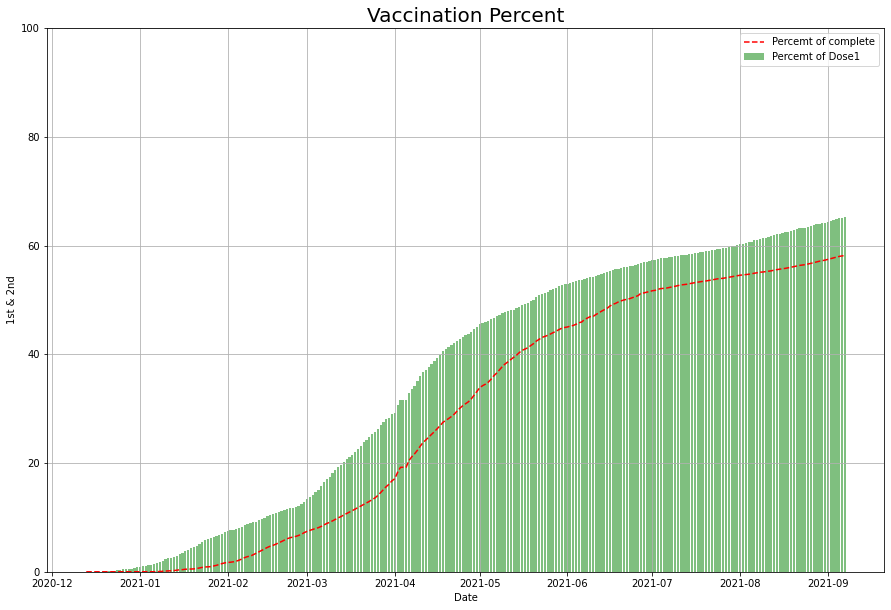

In [27]:
fig, ax = plt.subplots(figsize=(15, 10))

x = vaccine_NY.index
y1 = vaccine_NY['Percemt of complete']
y2 = vaccine_NY['Percemt of Dose1']

ax.plot(x, y1, 'r--')
# ax.plot(x, y2, 'r:')
# plt.bar(x, y1, color='g')
plt.bar(x, y2, color='g', alpha=0.5)
plt.ylim(0, 100)
plt.title('Vaccination Percent', fontsize=20)
plt.legend(['Percemt of complete', 'Percemt of Dose1'])
plt.xlabel('Date')
plt.ylabel('1st & 2nd')
plt.grid()

### 1.2.3 백신 접종률 시각화 (1차 & Complete)

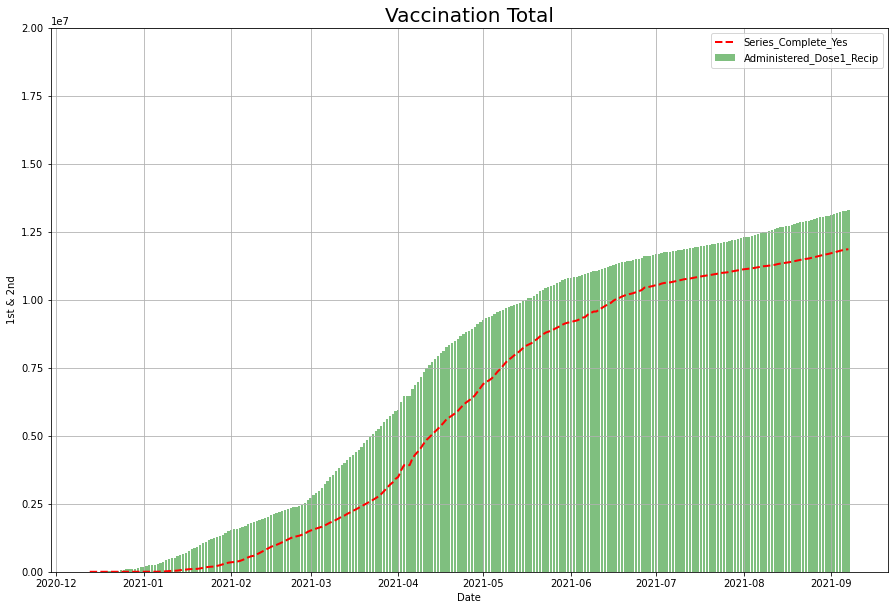

In [28]:
fig, ax = plt.subplots(figsize=(15, 10))

x = vaccine_NY.index
y1 = vaccine_NY['Series_Complete_Yes']
y2 = vaccine_NY['Administered_Dose1_Recip']

ax.plot(x, y1, 'r--', linewidth=2)
# ax.plot(x, y2, 'r:')
# plt.bar(x, y1, color='g')
plt.bar(x, y2, color='g', alpha=0.5)
plt.ylim(0, 20000000)
plt.title('Vaccination Total', fontsize=20)
plt.legend(['Series_Complete_Yes', 'Administered_Dose1_Recip'])
plt.xlabel('Date')
plt.ylabel('1st & 2nd')
plt.grid()

## 1.3 Green Taxi 이용자 수 및 이동거리
### 1.3.1 데이터 불러오기

In [29]:
pieces = []

for i in range(1, 13):
    path = './files/green_tripdata_2020-{}.csv'.format((str(i)).zfill(2))
    df = pd.read_csv(path)
    df['Month'] = i
    df = df.loc[:, ['passenger_count', 'trip_distance', 'Month']]
    df = df.groupby('Month').sum()
    
    pieces.append(df)
    taxi_data20 = pd.concat(pieces, ignore_index=False)

taxi_data20.head()

C:\Users\ChangHo Kim\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,passenger_count,trip_distance
Month,,
1,432598.0,1611699.55
2,416441.0,1957195.76
3,230152.0,1583166.10
4,27436.0,334410.77
5,36938.0,2167916.17


In [30]:
pieces = []

for i in range(1, 13):
    path = './files/green_tripdata_2019-{}.csv'.format((str(i)).zfill(2))
    df = pd.read_csv(path)
    df['Month'] = i
    df = df.loc[:, ['passenger_count', 'trip_distance', 'Month']]
    df = df.groupby('Month').sum()
    
    pieces.append(df)
    taxi_data19 = pd.concat(pieces, ignore_index=False)

taxi_data19.head()

C:\Users\ChangHo Kim\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,passenger_count,trip_distance
Month,,
1,831685.0,2169650.07
2,752145.0,2018287.43
3,781886.0,2076818.64
4,675613.0,1542114.00
5,659808.0,1503938.94


In [31]:
taxi_total = pd.concat([taxi_data19, taxi_data20], keys=['2019yr', '2020yr'])
taxi_total

passenger_count  trip_distance
       Month                                
2019yr 1             831685.0     2169650.07
       2             752145.0     2018287.43
       3             781886.0     2076818.64
       4             675613.0     1542114.00
       5             659808.0     1503938.94
       6             620846.0     1402742.90
       7             566946.0     1563070.18
       8             520140.0     1566423.54
       9             511536.0     1580697.81
       10            506322.0     1688128.25
       11            476779.0     1300109.95
       12            472041.0     1552421.19
2020yr 1             432598.0     1611699.55
       2             416441.0     1957195.76
       3             230152.0     1583166.10
       4              27436.0      334410.77
       5              36938.0     2167916.17
       6              47702.0     2893105.98
       7              53381.0     5635425.36
       8              59516.0     4410949.82
       9              62946.0     1137951.42
       10             68920.0     2575677.91
       11             62505.0     3556166.15
       12             58752.0     2121961.00

### 1.3.2 Pivot_table을 통해 총 이용자 및 이동거리 분석

In [32]:
taxi_total['year'] = [2019]*12 + [2020]*12
table = pd.pivot_table(taxi_total, values=['passenger_count', 'trip_distance'], columns=['year'],
                        aggfunc={'passenger_count':np.mean, 'trip_distance':np.sum})
table

year,2019,2020
passenger_count,6.146456e+05,1.297739e+05
trip_distance,1.996440e+07,2.998563e+07


In [33]:
taxi_total.loc[:,['trip_distance']]

trip_distance
       Month               
2019yr 1         2169650.07
       2         2018287.43
       3         2076818.64
       4         1542114.00
       5         1503938.94
       6         1402742.90
       7         1563070.18
       8         1566423.54
       9         1580697.81
       10        1688128.25
       11        1300109.95
       12        1552421.19
2020yr 1         1611699.55
       2         1957195.76
       3         1583166.10
       4          334410.77
       5         2167916.17
       6         2893105.98
       7         5635425.36
       8         4410949.82
       9         1137951.42
       10        2575677.91
       11        3556166.15
       12        2121961.00

### 1.3.3 택시 이용자 수 및 이동거리 시각화

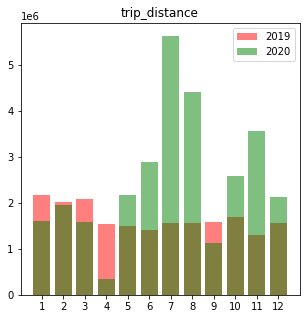

In [34]:
f, ax = plt.subplots(figsize = (5, 5))

x1 = list(range(1, 13, 1))
y1 = taxi_total['trip_distance']['2019yr']
y2 = taxi_total['trip_distance']['2020yr']
plt.bar(x1, y1, color = 'red', label='2019', alpha=0.5)
plt.bar(x1,  y2, color = 'green', label='2020', alpha=0.5)
ax.set_title('trip_distance')

ax.set_xticks(x1)
plt.legend()

plt.show()

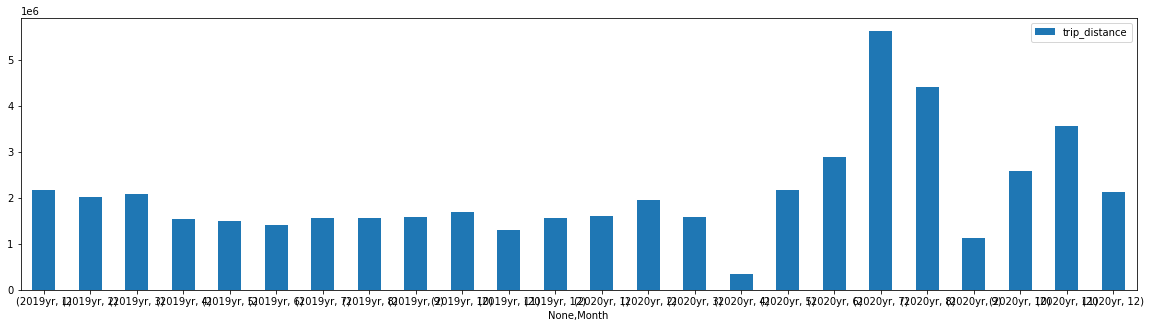

In [35]:
taxi_total.loc[:,['trip_distance']].plot(kind='bar',figsize=(20,5), rot=0)
plt.show()

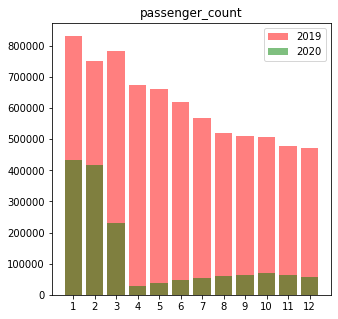

In [36]:
f, ax = plt.subplots(figsize = (5, 5))

x1 = list(range(1, 13, 1))
y1 = taxi_total['passenger_count']['2019yr']
y2 = taxi_total['passenger_count']['2020yr']
plt.bar(x1, y1, color = 'red', label='2019', alpha=0.5)
plt.bar(x1,  y2, color = 'green', label='2020', alpha=0.5)
ax.set_title('passenger_count')

ax.set_xticks(x1)
plt.legend()

plt.show()

## 1.4 공기오염도 조사

### 1.4.1 공기오염도 관련 데이터 가져오기

In [37]:
air_quality_2019 = pd.read_csv('./files/ad_viz_plotval_data_2019.csv')
air_quality_2019 = air_quality_2019.loc[:, ['Date', 'Daily Mean PM2.5 Concentration']]
box_plot_df = air_quality_2019
air_quality_2019.head()

,Date,Daily Mean PM2.5 Concentration
0,01/03/2019,5.3
1,01/06/2019,5.9
2,01/09/2019,3.0
3,01/12/2019,4.3
4,01/15/2019,12.0


In [38]:
air_quality_2019['Date'] = pd.to_datetime(air_quality_2019['Date'])
air_quality_2019 = air_quality_2019.set_index('Date', drop=True)
air_quality_2019.head()

,Daily Mean PM2.5 Concentration
Date,
2019-01-03,5.3
2019-01-06,5.9
2019-01-09,3.0
2019-01-12,4.3
2019-01-15,12.0


In [39]:
air_quality_2020 = pd.read_csv('./files/ad_viz_plotval_data_2020.csv')
air_quality_2020 = air_quality_2020.loc[:, ['Date', 'Daily Mean PM2.5 Concentration']]
box_plot_df_2020 = air_quality_2020
air_quality_2020.head()

,Date,Daily Mean PM2.5 Concentration
0,01/01/2020,1.9
1,01/04/2020,9.6
2,01/07/2020,5.0
3,01/10/2020,5.2
4,01/13/2020,4.0


In [40]:
air_quality_2020['Date'] = pd.to_datetime(air_quality_2020['Date'])
air_quality_2020 = air_quality_2020.set_index('Date', drop=True)
air_quality_2020.head()

,Daily Mean PM2.5 Concentration
Date,
2020-01-01,1.9
2020-01-04,9.6
2020-01-07,5.0
2020-01-10,5.2
2020-01-13,4.0


### 1.4.2 resample 함수를 이용하여 매월 평균적으로 초미세먼지 양 확인

In [41]:
air_quality_2019 = air_quality_2019.resample(rule='M').mean()
air_quality_2019.head()

,Daily Mean PM2.5 Concentration
Date,
2019-01-31,9.356051
2019-02-28,9.153846
2019-03-31,7.777019
2019-04-30,5.877622
2019-05-31,5.428477


In [42]:
air_quality_2020 = air_quality_2020.resample(rule='M').mean()
air_quality_2020.head()

,Daily Mean PM2.5 Concentration
Date,
2020-01-31,7.973206
2020-02-29,7.375887
2020-03-31,5.068677
2020-04-30,4.243284
2020-05-31,3.777638


### 1.4.3 matplotlib 을 이용하여 박스 테이블 시각화

Text(0.5, 1.0, '2019 Monthly PM2.5 Concentration')

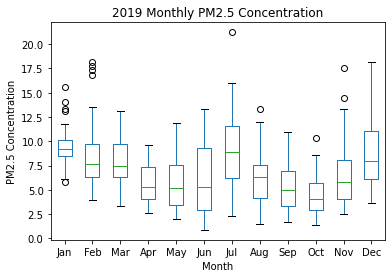

In [43]:
s = box_plot_df.groupby(box_plot_df['Date']).mean().sort_values('Date')
s = s.reset_index()
arr2d = []
columns=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul','Aug','Sep','Oct','Nov','Dec']
for month in range(12):
    l = list(s[s['Date'].astype(str).str.startswith("2019-"+str(month+1).zfill(2))]['Daily Mean PM2.5 Concentration'])
    for i in range(len(l),31,1):
        l.append( np.NaN )
    arr = np.array(l)
    arr2d.append(arr)
    
arr2d = np.array(arr2d).transpose()
boxplot = pd.DataFrame(arr2d, columns=columns)

aq_2019_boxplot = boxplot.boxplot(column=columns, grid=False)
aq_2019_boxplot.set_ylabel('PM2.5 Concentration')
aq_2019_boxplot.set_xlabel('Month')
aq_2019_boxplot.set_title('2019 Monthly PM2.5 Concentration')

Text(0.5, 1.0, '2029 Monthly PM2.5 Concentration')

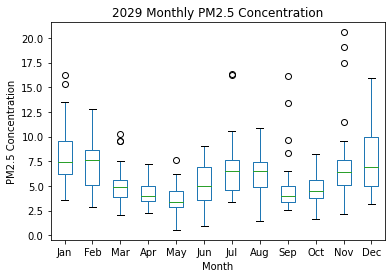

In [44]:
s = box_plot_df_2020.groupby(box_plot_df_2020['Date']).mean().sort_values('Date')
s = s.reset_index()
arr2d20 = []
columns=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul','Aug','Sep','Oct','Nov','Dec']
for month in range(12):
    l = list(s[s['Date'].astype(str).str.startswith("2020-"+str(month+1).zfill(2))]['Daily Mean PM2.5 Concentration'])
    for i in range(len(l),31,1):
        l.append( np.NaN )
    arr = np.array(l)
    arr2d20.append(arr)
    
arr2d20 = np.array(arr2d20).transpose()
boxplot20 = pd.DataFrame(arr2d20, columns=columns)

aq_2020_boxplot = boxplot20.boxplot(column=columns, grid=False)
aq_2020_boxplot.set_ylabel('PM2.5 Concentration')
aq_2020_boxplot.set_xlabel('Month')
aq_2020_boxplot.set_title('2029 Monthly PM2.5 Concentration')

### 1.4.4 Seaborn을 사용한 시각화 비교분석 (box plot)

In [45]:
monthly_plot = {}
months = []
years = []
days = []
pms = []

months2019 = []
months2020 = []
pms2019 = []
pms2020 = []

for month in range(12):
    arr = np.array(boxplot.iloc[:,month])
    months.extend([columns[month]]*len(arr))
    months2019.extend([columns[month]]*len(arr))
    pms.extend([x for x in arr])
    pms2019.extend([x for x in arr])
    years.extend([2019]*len(arr))
    days.extend([i+1 for i in range(len(arr))])

for month in range(12):
    arr = np.array(boxplot20.iloc[:,month])
    months.extend([columns[month]]*len(arr))
    months2020.extend([columns[month]]*len(arr))
    pms.extend([x for x in arr])
    pms2020.extend([x for x in arr])
    years.extend([2020]*len(arr))

aq2019_df = df = pd.DataFrame({
    'Month': months2019,
    'PM2.5': pms2019,
    'Day': days
})

aq2020_df = df = pd.DataFrame({
    'Month': months2020,
    'PM2.5': pms2020,
    'Day': days
})

df = pd.DataFrame({
    'Month': months,
    'PM2.5': pms,
    'year': years
})

df

,Month,PM2.5,year
0,Jan,9.500000,2019
1,Jan,11.566667,2019
2,Jan,8.462500,2019
3,Jan,13.325000,2019
4,Jan,10.125000,2019
...,...,...,...
739,Dec,10.312000,2020
740,Dec,9.380000,2020
741,Dec,5.048780,2020
742,Dec,6.026923,2020


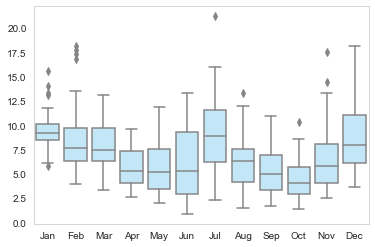

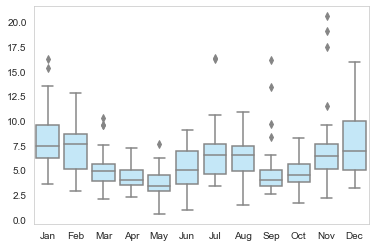

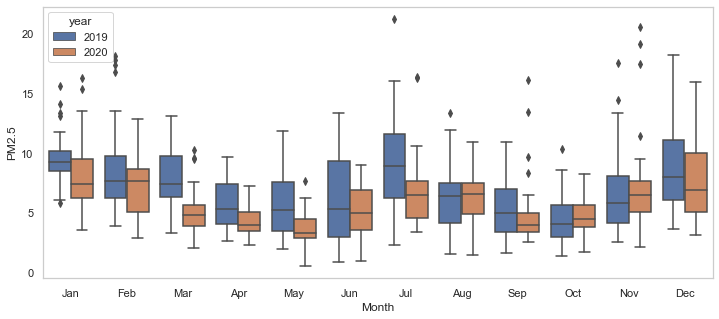

In [46]:
sns.set_style("whitegrid", {'axes.grid' : False})
sns.boxplot(data=boxplot, color='#bbeaff')
plt.show()
sns.boxplot(data=boxplot20, color='#bbeaff')
plt.show()
sns.set(rc={'figure.figsize':(12,5)})

sns.set_style("whitegrid", {'axes.grid' : False})
sns.boxplot(data=df, hue='year',x='Month',y='PM2.5')
plt.show()

### 1.4.5 Seaborn을 이용한 시각화 비교분석 (heatmap)

In [47]:
aq2020_pv = aq2020_df.pivot("Day", "Month", "PM2.5")
aq2019_pv = aq2019_df.pivot("Day", "Month", "PM2.5")
aq2020_pv = aq2020_pv[columns]
aq2019_pv = aq2019_pv[columns]

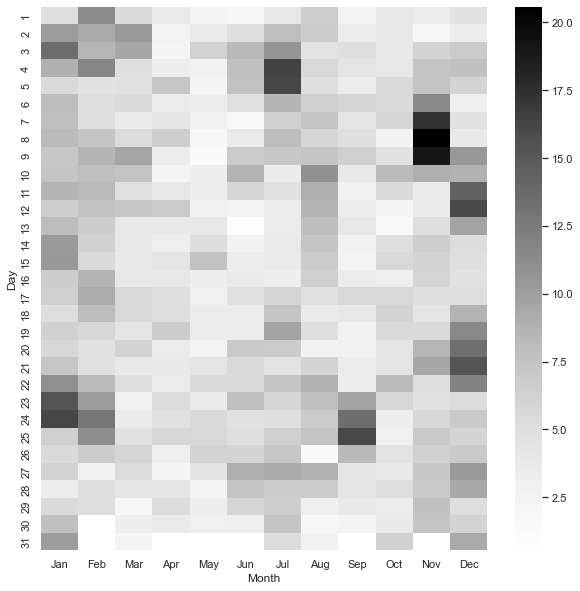

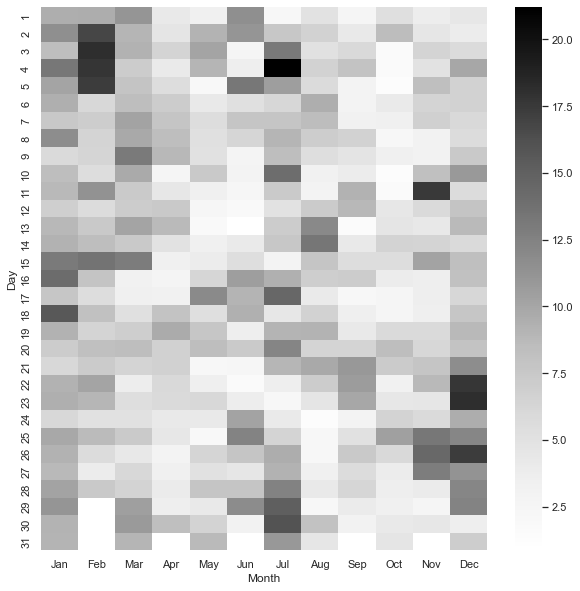

In [48]:
plt.figure(figsize=(10, 10))
ax = sns.heatmap(aq2020_pv, annot=False, fmt="f", cmap='Greys')

plt.figure(figsize=(10, 10))
ax = sns.heatmap(aq2019_pv, annot=False, fmt="f", cmap='Greys')

### 1.4.6 Matplotlib을 이용한 시각화 비교분석 (line graph)

In [49]:
air_quality_total =pd.concat([air_quality_2019, air_quality_2020], keys=['2019yr', '2020yr'])
air_quality_total.head()

Daily Mean PM2.5 Concentration
       Date                                      
2019yr 2019-01-31                        9.356051
       2019-02-28                        9.153846
       2019-03-31                        7.777019
       2019-04-30                        5.877622
       2019-05-31                        5.428477

In [50]:
air_quality_total['year'] = [2019]*12 + [2020]*12
table = pd.pivot_table(air_quality_total, values='Daily Mean PM2.5 Concentration', columns=['year'],
                        aggfunc=np.mean)
table

year,2019,2020
Daily Mean PM2.5 Concentration,7.098749,5.985835


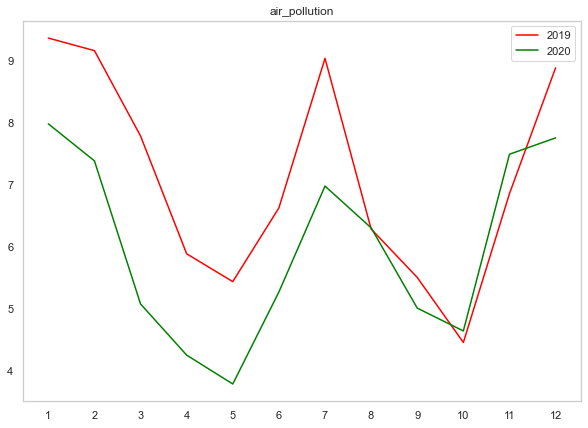

In [51]:
f, ax = plt.subplots(figsize = (10, 7))

x1 = list(range(1, 13, 1))
y1 = air_quality_total.loc['2019yr', 'Daily Mean PM2.5 Concentration']
y2 = air_quality_total.loc['2020yr', 'Daily Mean PM2.5 Concentration']
plt.plot(x1, y1, color = 'red', label='2019')
plt.plot(x1, y2, color = 'green', label='2020')
ax.set_title('air_pollution')
ax.set_xticks(x1)
ax.legend()

plt.show()

# 2. 백신 접종률과 확진자 및 사망자 상관관계
## 2.1 백신 접종률에 따른 확진자 수 분석
### 2.1.1 확진자 수와 백신 접종률 Data Preprocessing

In [52]:
columns = ['State', 'Date', 'New Cases']
ny_cases = pd.read_csv('files/data_table_for_daily_case_trends__new_york_(excludes_nyc)_.csv', index_col=None, skiprows=[0,1], usecols=columns)
nyc_cases = pd.read_csv('files/data_table_for_daily_case_trends__new_york_city_.csv', index_col=None, skiprows=[0,1], usecols=columns)
nyc_cases = nyc_cases[nyc_cases['New Cases'] != 0]
ny_cases = ny_cases[ny_cases['New Cases'] != 0]

ny_total = pd.merge(ny_cases, nyc_cases, on='Date', how='inner')
ny_total['New Cases Sum'] = ny_total['New Cases_x'] + ny_total['New Cases_y']
ny_total.rename(columns = {'New Cases_x' : 'New York (Exclude NYC) New Cases', 'New Cases_y': 'New York City New Cases'}, inplace = True)

ny_total['Date'] = pd.to_datetime(ny_total['Date'])
ny_total = ny_total.sort_values(by="Date")
ny_total = ny_total.set_index('Date')
ny_total.head()

,State_x,New York (Exclude NYC) New Cases,State_y,New York City New Cases,New Cases Sum
Date,,,,,
2020-03-05,New York,11,New York City,1,12
2020-03-06,New York,9,New York City,5,14
2020-03-07,New York,7,New York City,3,10
2020-03-09,New York,97,New York City,7,104
2020-03-10,New York,12,New York City,21,33


In [53]:
ny_total = ny_total.resample(rule='M').last()
ny_total.head()

,State_x,New York (Exclude NYC) New Cases,State_y,New York City New Cases,New Cases Sum
Date,,,,,
2020-03-31,New York,3612,New York City,3623,7235
2020-04-30,New York,2044,New York City,2757,4801
2020-05-31,New York,558,New York City,655,1213
2020-06-30,New York,284,New York City,218,502
2020-07-31,New York,359,New York City,312,671


In [54]:
vaccine_NY_M = vaccine_NY.resample(rule='M').last()
vaccine_NY_M.head()

,Series_Complete_Yes,Administered_Dose1_Recip,Total population,Percemt of complete,Percemt of Dose1
Date,,,,,
2020-12-31,487,162338.0,20400000,0.002387,0.795775
2021-01-31,336219,1488264.0,20400000,1.648132,7.295412
2021-02-28,1471039,2635409.0,20400000,7.210975,12.918672
2021-03-31,3415965,5903738.0,20400000,16.744926,28.939892
2021-04-30,6767658,9193774.0,20400000,33.174794,45.067520


In [55]:
n1 = len(ny_total) - len(vaccine_NY_M)
zero_v = pd.DataFrame([[0, 0, 0, 0, 0]]*n1, columns=vaccine_NY_M.columns)
zero_v

,Series_Complete_Yes,Administered_Dose1_Recip,Total population,Percemt of complete,Percemt of Dose1
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0
5,0,0,0,0,0
6,0,0,0,0,0
7,0,0,0,0,0
8,0,0,0,0,0


In [56]:
columns = vaccine_NY.columns
v = pd.concat([zero_v, vaccine_NY_M],  ignore_index=True)
v

,Series_Complete_Yes,Administered_Dose1_Recip,Total population,Percemt of complete,Percemt of Dose1
0,0,0.0,0,0.000000,0.000000
1,0,0.0,0,0.000000,0.000000
2,0,0.0,0,0.000000,0.000000
3,0,0.0,0,0.000000,0.000000
4,0,0.0,0,0.000000,0.000000
5,0,0.0,0,0.000000,0.000000
6,0,0.0,0,0.000000,0.000000
7,0,0.0,0,0.000000,0.000000
8,0,0.0,0,0.000000,0.000000
9,487,162338.0,20400000,0.002387,0.795775


### 2.1.2 확진자 수와 백신 접종률 Data 시각화

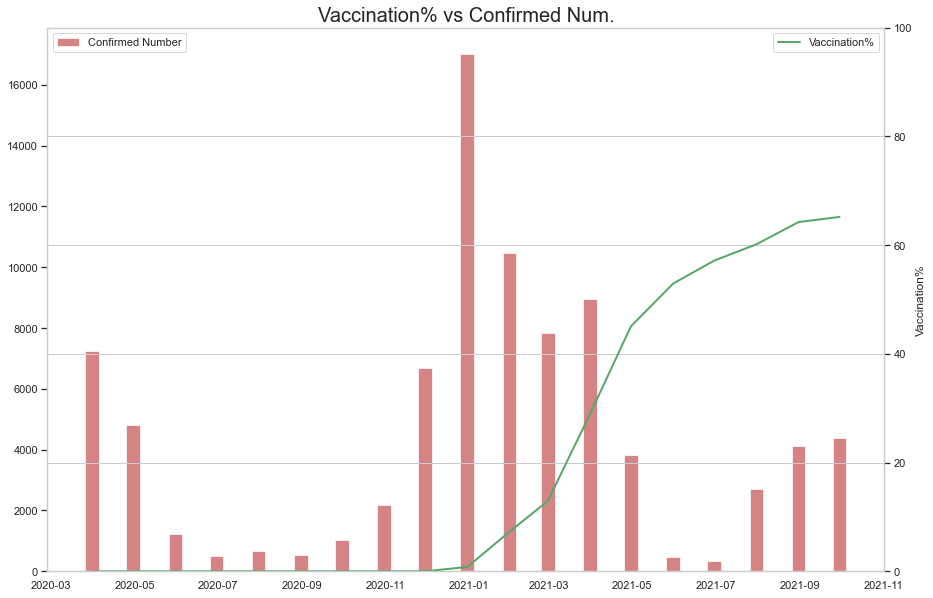

In [57]:
x = ny_total.index
y1 = ny_total['New Cases Sum']
y2 = v['Percemt of Dose1']

plt.rcParams['figure.figsize'] = (15, 10)

fig, ax1 = plt.subplots()
ax1.bar(x, y1, color='r', label='Confirmed Number', alpha=0.7, width=10)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.plot(x, y2, color='g', label='Vaccination%', linewidth=2)
ax2.legend(loc='upper right')
ax2.set_ylim([0, 100])

plt.title('Vaccination% vs Confirmed Num.', fontsize=20)
plt.xlabel('Date')
plt.ylabel('Confirmed Number')
plt.ylabel('Vaccination%')
plt.grid()

## 2.2 백신 접종률에 따른 사망자 수 분석
### 2.2.1 확진자 수와 백신 접종률 Data Preprocessing

In [58]:
us_deaths_sex_age = pd.read_csv('files/Provisional_COVID-19_Deaths_by_Sex_and_Age.csv',usecols=['Year','State','Month','Sex','Age Group','COVID-19 Deaths','Group'],index_col=None)
ny_deaths = pd.read_csv('files/data_table_for_daily_death_trends__new_york_(excludes_nyc)_.csv', index_col=None, skiprows=[0,1], usecols=['State','Date','New Deaths'])
nyc_deaths = pd.read_csv('files/data_table_for_daily_death_trends__new_york_city_.csv', index_col=None, skiprows=[0,1], usecols=['State','Date','New Deaths'])

nyc_deaths = nyc_deaths[nyc_deaths['New Deaths'] != 0]
ny_deaths = ny_deaths[ny_deaths['New Deaths'] != 0]
ny_total_deaths = pd.merge(ny_deaths, nyc_deaths, on='Date', how='inner')

ny_total_deaths['New Deaths Sum'] = ny_total_deaths['New Deaths_x'] + ny_total_deaths['New Deaths_y']
ny_total_deaths.rename(columns = {'New Deaths_x' : 'New York (Exclude NYC) New Deaths', 'New Deaths_y': 'New York City New Deaths'}, inplace = True)
ny_total_deaths['Date'] = pd.to_datetime(ny_total_deaths['Date'])
ny_total_deaths = ny_total_deaths.set_index('Date')

ny_total_deaths = ny_total_deaths.sort_values(by="Date")
ny_total_deaths.head()

,State_x,New York (Exclude NYC) New Deaths,State_y,New York City New Deaths,New Deaths Sum
Date,,,,,
2020-03-19,New York,4,New York City,11,15
2020-03-20,New York,10,New York City,24,34
2020-03-21,New York,6,New York City,27,33
2020-03-22,New York,3,New York City,50,53
2020-03-23,New York,7,New York City,50,57


In [59]:
ny_total_deaths = ny_total_deaths.resample(rule='M').last()
ny_total_deaths.head()

,State_x,New York (Exclude NYC) New Deaths,State_y,New York City New Deaths,New Deaths Sum
Date,,,,,
2020-03-31,New York,56,New York City,353,409
2020-04-30,New York,175,New York City,259,434
2020-05-31,New York,30,New York City,51,81
2020-06-30,New York,7,New York City,12,19
2020-07-31,New York,4,New York City,5,9


In [60]:
n2 = len(ny_total_deaths) - len(vaccine_NY_M)
zero_v2 = pd.DataFrame([[0, 0, 0, 0, 0]]*n2, columns=vaccine_NY_M.columns)
zero_v2

,Series_Complete_Yes,Administered_Dose1_Recip,Total population,Percemt of complete,Percemt of Dose1
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0
5,0,0,0,0,0
6,0,0,0,0,0
7,0,0,0,0,0
8,0,0,0,0,0


In [61]:
columns = vaccine_NY_M.columns
v2 = pd.concat([zero_v2, vaccine_NY_M],  ignore_index=True)
v2

,Series_Complete_Yes,Administered_Dose1_Recip,Total population,Percemt of complete,Percemt of Dose1
0,0,0.0,0,0.000000,0.000000
1,0,0.0,0,0.000000,0.000000
2,0,0.0,0,0.000000,0.000000
3,0,0.0,0,0.000000,0.000000
4,0,0.0,0,0.000000,0.000000
5,0,0.0,0,0.000000,0.000000
6,0,0.0,0,0.000000,0.000000
7,0,0.0,0,0.000000,0.000000
8,0,0.0,0,0.000000,0.000000
9,487,162338.0,20400000,0.002387,0.795775


### 2.2.2 사망자 수와 백신 접종률 Data 시각화

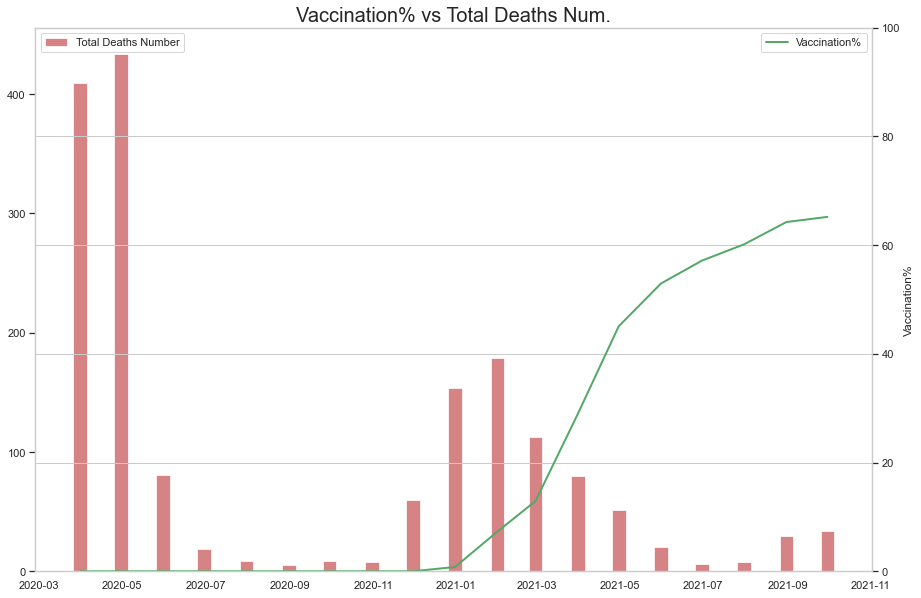

In [62]:
x = ny_total_deaths.index
y1 = ny_total_deaths['New Deaths Sum']
y2 = v2['Percemt of Dose1']

plt.rcParams['figure.figsize'] = (15, 10)

fig, ax1 = plt.subplots()
ax1.bar(x, y1, color='r', label='Total Deaths Number', alpha=0.7, width=10)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.plot(x, y2, color='g', label='Vaccination%', linewidth=2)
ax2.legend(loc='upper right')
ax2.set_ylim([0, 100]) 

plt.title('Vaccination% vs Total Deaths Num.', fontsize=20)
plt.xlabel('Date')
plt.ylabel('Total Deaths Number')
plt.ylabel('Vaccination%')
plt.grid()

### 2.2.3 사망자와 확진자 수 Data 시각화

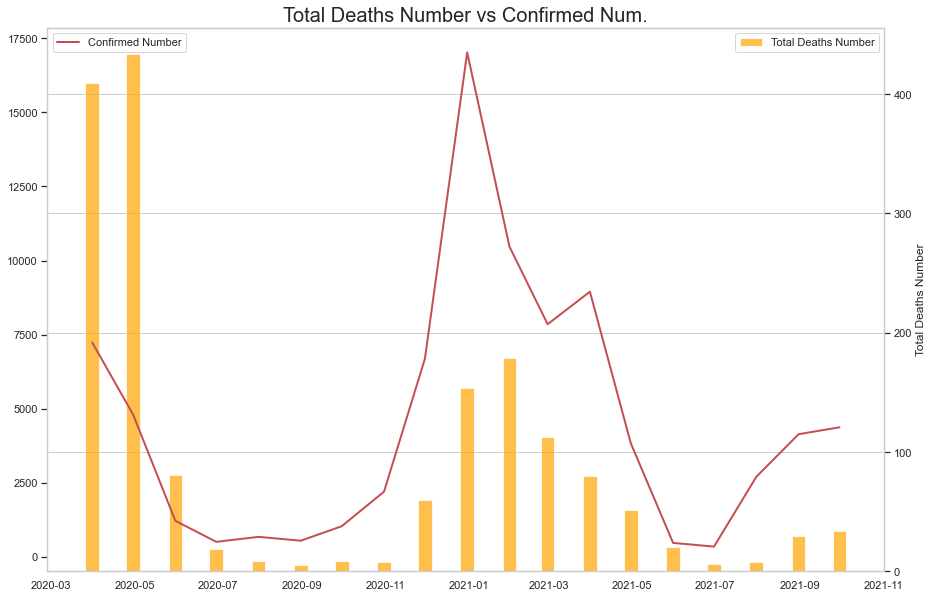

In [63]:
x = ny_total.index
y1 = ny_total['New Cases Sum']
y2 = ny_total_deaths['New Deaths Sum']

plt.rcParams['figure.figsize'] = (15, 10)

fig, ax1 = plt.subplots()
ax1.plot(x, y1, color='r', label='Confirmed Number', linewidth=2)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.bar(x, y2, color='orange', label='Total Deaths Number', alpha=0.7, width=10)
ax2.legend(loc='upper right')

ax1.set_zorder(ax2.get_zorder() + 10)
ax1.patch.set_visible(False)

plt.title('Total Deaths Number vs Confirmed Num.', fontsize=20)
plt.xlabel('Date')
plt.ylabel('Confirmed Number')
plt.ylabel('Total Deaths Number')
plt.grid()

# 3. 확진자와 Air Quality와의 상관관계
## 3.1 확진자 수와 택시 이용객 수 시각화
### 3.1.1 그린택시 Data 불러오기 및 Preprocessing

In [64]:
pieces = []

for i in range(1, 13):
    path = './files/green_tripdata_2020-{}.csv'.format((str(i)).zfill(2))
    df = pd.read_csv(path)
    df['Month'] = i
    df = df.loc[:, ['passenger_count', 'trip_distance', 'Month']]
    df = df.groupby('Month').sum()
    
    pieces.append(df)
    taxi_data20 = pd.concat(pieces, ignore_index=False)

pieces = []

for i in range(1, 13):
    path = './files/green_tripdata_2019-{}.csv'.format((str(i)).zfill(2))
    df = pd.read_csv(path)
    df['Month'] = i
    df = df.loc[:, ['passenger_count', 'trip_distance', 'Month']]
    df = df.groupby('Month').sum()
    
    pieces.append(df)
    taxi_data19 = pd.concat(pieces, ignore_index=False)


C:\Users\ChangHo Kim\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [65]:
taxi_total = pd.concat([taxi_data19, taxi_data20], keys=['2019yr', '2020yr'])
taxi20 = taxi_total.loc[['2020yr'], ['passenger_count']]
taxi20 = taxi20.iloc[2:]
taxi20

passenger_count
       Month                 
2020yr 3             230152.0
       4              27436.0
       5              36938.0
       6              47702.0
       7              53381.0
       8              59516.0
       9              62946.0
       10             68920.0
       11             62505.0
       12             58752.0

In [66]:
ny_total20 = ny_total.iloc[:10]
ny_total20

,State_x,New York (Exclude NYC) New Cases,State_y,New York City New Cases,New Cases Sum
Date,,,,,
2020-03-31,New York,3612,New York City,3623,7235
2020-04-30,New York,2044,New York City,2757,4801
2020-05-31,New York,558,New York City,655,1213
2020-06-30,New York,284,New York City,218,502
2020-07-31,New York,359,New York City,312,671
2020-08-31,New York,388,New York City,153,541
2020-09-30,New York,554,New York City,476,1030
2020-10-31,New York,1350,New York City,846,2196
2020-11-30,New York,4315,New York City,2370,6685


### 3.1.2 확진자수에 따른 그린택시 이용자 수 시각화

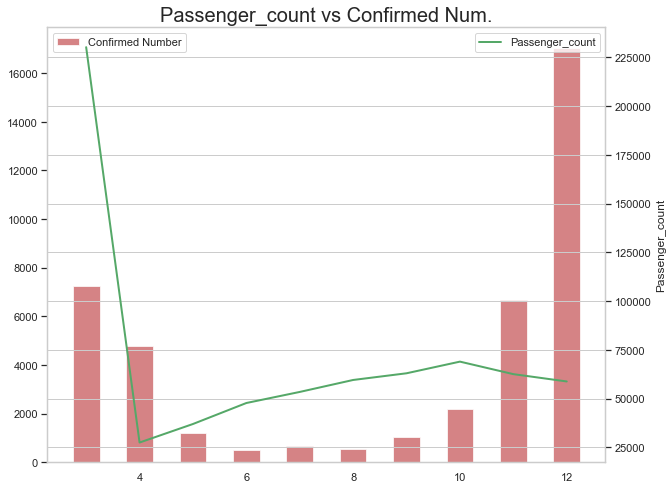

In [67]:
x = range(3, 13, 1)
y1 = ny_total20['New Cases Sum']
y2 = taxi20['passenger_count']

plt.rcParams['figure.figsize'] = (10, 8)

fig, ax1 = plt.subplots()
ax1.bar(x, y1, color='r', label='Confirmed Number', alpha=0.7, width=0.5)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.plot(x, y2, color='g', label='Passenger_count', linewidth=2)
ax2.legend(loc='upper right')

# ax1.set_zorder(ax2.get_zorder() + 10)
# ax1.patch.set_visible(False)

plt.title('Passenger_count vs Confirmed Num.', fontsize=20)
plt.xlabel('Date')
plt.ylabel('Confirmed Number')
plt.ylabel('Passenger_count')
plt.grid()
plt.show()

## 3.2 공기오염도와 택시 사용량의 관계도 분석

## 3.2.1 모든 택시 데이터 가져오기

In [68]:
pieces = []

for i in range(1, 13):
    path = './files/green_tripdata_2020-{}.csv'.format((str(i)).zfill(2))
    df = pd.read_csv(path)
    df['Month'] = i
    df = df.loc[:, ['passenger_count', 'trip_distance', 'Month']]
    df = df.groupby('Month').sum()
    
    pieces.append(df)
    taxi_data20 = pd.concat(pieces, ignore_index=False)

pieces = []

for i in range(1, 13):
    path = './files/green_tripdata_2019-{}.csv'.format((str(i)).zfill(2))
    df = pd.read_csv(path)
    df['Month'] = i
    df = df.loc[:, ['passenger_count', 'trip_distance', 'Month']]
    df = df.groupby('Month').sum()
    
    pieces.append(df)
    taxi_data19 = pd.concat(pieces, ignore_index=False)

taxi_data19.head()
taxi_total =pd.concat([taxi_data19, taxi_data20], keys=['2019yr', '2020yr'])
taxi_total

C:\Users\ChangHo Kim\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


passenger_count  trip_distance
       Month                                
2019yr 1             831685.0     2169650.07
       2             752145.0     2018287.43
       3             781886.0     2076818.64
       4             675613.0     1542114.00
       5             659808.0     1503938.94
       6             620846.0     1402742.90
       7             566946.0     1563070.18
       8             520140.0     1566423.54
       9             511536.0     1580697.81
       10            506322.0     1688128.25
       11            476779.0     1300109.95
       12            472041.0     1552421.19
2020yr 1             432598.0     1611699.55
       2             416441.0     1957195.76
       3             230152.0     1583166.10
       4              27436.0      334410.77
       5              36938.0     2167916.17
       6              47702.0     2893105.98
       7              53381.0     5635425.36
       8              59516.0     4410949.82
       9              62946.0     1137951.42
       10             68920.0     2575677.91
       11             62505.0     3556166.15
       12             58752.0     2121961.00

### 3.2.2 모든 데이터 합치기

In [69]:
a = air_quality_total.reset_index()[["Date", "Daily Mean PM2.5 Concentration"]]
a['Date']=[date[:7] for date in list(np.array(a['Date'].astype(str)))]
a

,Date,Daily Mean PM2.5 Concentration
0,2019-01,9.356051
1,2019-02,9.153846
2,2019-03,7.777019
3,2019-04,5.877622
4,2019-05,5.428477
5,2019-06,6.617361
6,2019-07,9.029457
7,2019-08,6.277586
8,2019-09,5.496396
9,2019-10,4.447826


In [70]:
dates = []
taxi_data19_d = taxi_data19.reset_index()['Month']
taxi_data20_d = taxi_data20.reset_index()['Month']
for m in taxi_data19_d:
    d = "2019-" + str(m).zfill(2)
    dates.append(d)
taxi_data19['Date']=np.array(dates)

dates = []
for m in taxi_data20_d:
    d = "2020-" + str(m).zfill(2)
    dates.append(d)

taxi_data20['Date']=np.array(dates)

In [71]:
taxi_data19 = taxi_data19.reset_index()
taxi_data20 = taxi_data20.reset_index()
print(taxi_data19)
print(taxi_data20)

    Month  passenger_count  trip_distance     Date
0       1         831685.0     2169650.07  2019-01
1       2         752145.0     2018287.43  2019-02
2       3         781886.0     2076818.64  2019-03
3       4         675613.0     1542114.00  2019-04
4       5         659808.0     1503938.94  2019-05
5       6         620846.0     1402742.90  2019-06
6       7         566946.0     1563070.18  2019-07
7       8         520140.0     1566423.54  2019-08
8       9         511536.0     1580697.81  2019-09
9      10         506322.0     1688128.25  2019-10
10     11         476779.0     1300109.95  2019-11
11     12         472041.0     1552421.19  2019-12
    Month  passenger_count  trip_distance     Date
0       1         432598.0     1611699.55  2020-01
1       2         416441.0     1957195.76  2020-02
2       3         230152.0     1583166.10  2020-03
3       4          27436.0      334410.77  2020-04
4       5          36938.0     2167916.17  2020-05
5       6          47702.0     

In [72]:
taxi_data19 = taxi_data19.drop(['Month'],axis=1)
taxi_data20 = taxi_data20.drop(['Month'],axis=1)

### 3.2.3 공기오염도와 택시 데이터 Merge하기

In [73]:
aq_total_simple = a
taxi_total_simple = pd.concat([taxi_data19, taxi_data20], axis=0)
taxi_aq = pd.merge(taxi_total_simple,aq_total_simple, on='Date', how='inner')
taxi_aq

,passenger_count,trip_distance,Date,Daily Mean PM2.5 Concentration
0,831685.0,2169650.07,2019-01,9.356051
1,752145.0,2018287.43,2019-02,9.153846
2,781886.0,2076818.64,2019-03,7.777019
3,675613.0,1542114.00,2019-04,5.877622
4,659808.0,1503938.94,2019-05,5.428477
5,620846.0,1402742.90,2019-06,6.617361
6,566946.0,1563070.18,2019-07,9.029457
7,520140.0,1566423.54,2019-08,6.277586
8,511536.0,1580697.81,2019-09,5.496396
9,506322.0,1688128.25,2019-10,4.447826


### 3.2.4 데이터 시각화

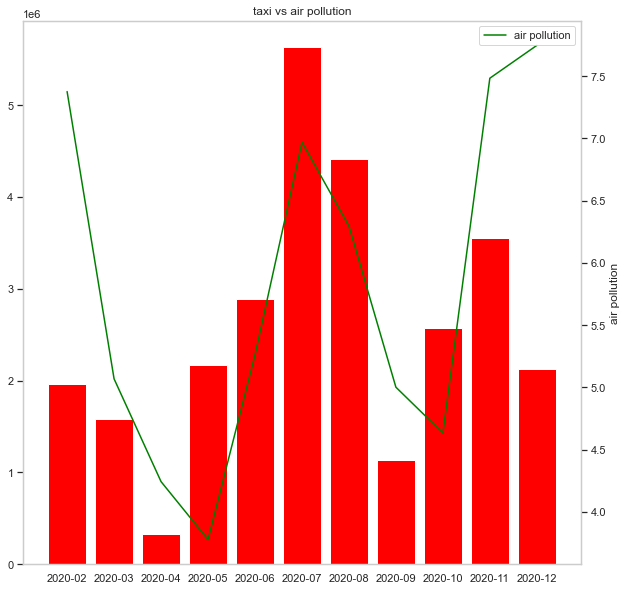

In [74]:
f, ax = plt.subplots(figsize = (10, 10))
ax2 = ax.twinx()
x1 = taxi_aq['Date'][13:]
y1 = taxi_aq['trip_distance'][13:]
y2 = taxi_aq['Daily Mean PM2.5 Concentration'][13:]
ax.bar(x1, y1, color = 'red', label='taxi')
ax2.plot(x1,  y2, color = 'green', label='air pollution')
ax.set_title('taxi vs air pollution')
ax2.set_ylabel("air pollution")
# ax.set_xticks(np.arange(0,25,4))
plt.legend()

plt.show()